<div style="display: flex; align-items: center;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Practica 6: Diseño de filtros digitales</font></b></h1>
                <h3><font color='0B5345'>Luisa Fernanda Enciso - Jader Stalyn Chingal Atis</font></h3>
    </div>
</div>

<hr>

4.1. Proponga una secuencia sinusoidal x_e (n), con 0≤n≤1000, F_0=0,01Hz y F_s=25Hz. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico. El viaje de la señal hipotética x_e (n) a través de los diversos tejidos genera una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma:

y_e(n) = αx_e(n-D)+w(n)

Donde α representa la amplitud, D es un retraso debido a la conducción a través de los diversos tejidos y w(n)  representa el ruido generado por la electrónica de los sistemas de adquisición.

Genere las secuencias ficticias x_e (n) y y_e (n), implemente w(n)  como una secuencia de ruido Gaussiano con media cero y varianza σ^2=0,01, establezca α=0,8 y un retraso D=15 muestras. Grafique ambas señales.

In [60]:
# importación de librerías
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

Text(0.5, 0, 'Tiempo (s)')

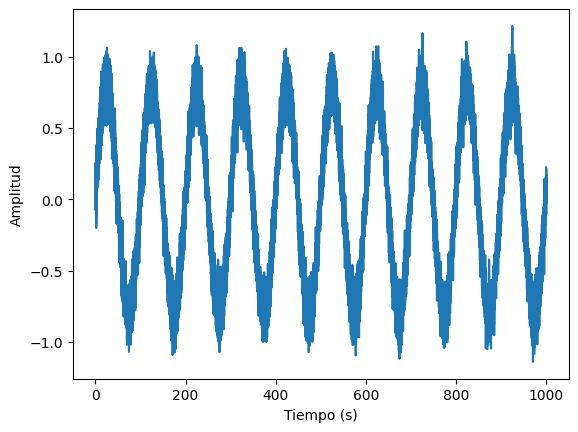

In [61]:
# creación de x_e, y_e, w_e
F0 = 0.01 # frecuencia fundamental
Fs = 25 #frecuencia de muestreo
alfa = 0.8 # atenuación
D = 15 # retrado induciodo en la adquisición
var = 0.01 # varianza del ruido
media = 0 # media del ruido
n = np.arange(0,1001,1/Fs) # tiempo
x_e = np.sin(2*np.pi*F0*(n+D/Fs)) #potencial con con retraso
w = np.random.normal(media,np.sqrt(var),len(n)) # ruido gausiano
y_e = alfa*x_e + w # señal adquirida con ruido y retrado.

plt.plot(n,y_e)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

<hr>

4.2.La función firwin permite diseñar un filtro FIR utilizando el método de ventanas, donde los principales argumentos de entrada son N: Orden del filtro y W_n: Frecuencia de corte. Para filtros digitales W_n está normalizado entre 0 y 1, donde 1 es la frecuencia de Nyquist que es igual a la mitad de la frecuencia de muestreo de la señal. W_n es igual a la frecuencia de corte del filtro dividido la frecuencia de Nyquist.



* Diseñe un filtro FIR pasa bajas para la señal y_e (n), con una frecuencia de corte de 1.25 muestras/s y orden 30.

In [62]:
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
lowpass = signal.firwin(order+1,wn, pass_zero = 'lowpass',window='hamming') #filtro
y_fpb_30 = signal.filtfilt(b=lowpass,a=1,x=y_e) # aplicación del filtro


* ¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.

In [63]:
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn = 7.5/nyquist #frecuencia de corte normalizada respecto nyquist
highpass = signal.firwin(order+1,wn, pass_zero = 'highpass',window='hamming') #filtro
y_fpa_30 = signal.filtfilt(b=highpass,a=1,x=y_e) # aplicación del filtro


In [64]:
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn_low = 7.5/nyquist #frecuencia de corte normalizada respecto nyquist
wn_high= 1.25/nyquist
bandpass = signal.firwin(order+1,[wn_high,wn_low], pass_zero = 'bandpass',window='hamming') #filtro
y_fpbd_30 = signal.filtfilt(b=bandpass,a=1,x=y_e) # aplicación del filtro


Text(0.5, 0, 'Tiempo (s)')

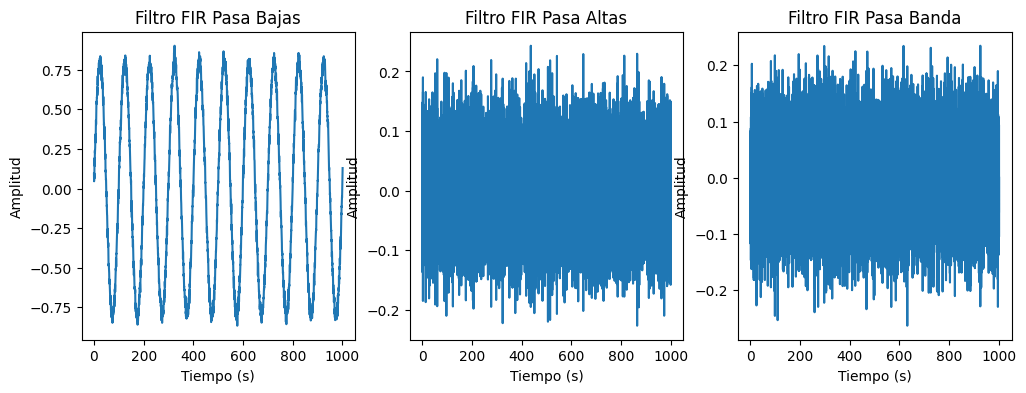

In [70]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.plot(n,y_fpb_30)
plt.title("Filtro FIR Pasa Bajas")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.subplot(132)
plt.plot(n,y_fpa_30)
plt.title("Filtro FIR Pasa Altas")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.subplot(133)
plt.plot(n,y_fpbd_30)
plt.title("Filtro FIR Pasa Banda")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

* Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare 
cambios. 